<a href="https://colab.research.google.com/github/ShweataNHegde/riem_chem/blob/main/titration_graph_trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=c7667a454e3df1911237ac5ddab8af2fde24e1b65479fff4d2ba974896fa999c
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
#importing modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import chart_studio.plotly as py
import math
# theme set up
sns.set_theme(color_codes=True)

In [4]:
def plot_graph_find_slope(df, x_axis,y_axis):

  fig = px.scatter(df, x_axis, y_axis, trendline="ols")
  fig.show()
  slope, intercept = np.polyfit(df[x_axis].tolist(), df[y_axis].tolist(), 1) 
  print(f"slope = {slope}")

def convert_lists_to_df(list_of_lists, list_of_columns):
  df = pd.DataFrame(list_of_lists).transpose() 
  df.columns=list_of_columns
  return df

def rate_const_logs(alpha, alpha_infinity, alpha_not):
  final_alpha = [x - alpha_infinity for x in alpha]
  some_value = alpha_not - alpha_infinity
  log_final_alpha = [math.log(x, 10) for x in final_alpha]
  log_another_final = [math.log(some_value/x, 10) for x in final_alpha]
  return final_alpha, log_final_alpha, log_another_final

## Iodination of Acetone (Colorimeter)

In [ ]:
# reading csv data
df_palls =pd.read_csv('titration_graph_test.csv')
print(df_palls)

   Time(seconds)  Transmittance  Absorbance
0             20             25        0.59
1            140             30        0.53
2            260             35        0.46
3            380             42        0.38
4            500             52        0.29
5            620             65        0.19
6            740             83        0.08
7            860            106        0.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


slope = -0.0007222222222222225


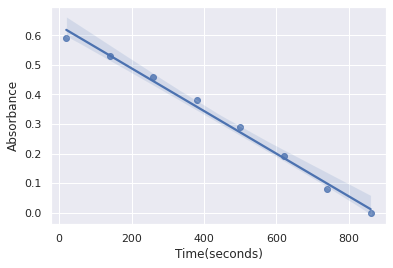

In [ ]:
plot_graph_find_slope(df_palls, 'Time(seconds)', 'Absorbance' )

In [ ]:
absorbance = [0.84, 0.80, 0.75, 0.65, 0.45, 0.06, 0.02, 0.02, 0.01, 0.01, 0.01, 0, 0]
time = [29, 300, 600, 900, 1200, 1500, 1570, 1800, 1980, 2040, 2100, 2151, 2184]

In [ ]:
column_list = ['absorbance', 'time']
df_snh = convert_lists_to_df([absorbance, time], column_list)
plot_graph_find_slope(df_snh,'time','absorbance')


slope = -0.0004603756655222773


In [ ]:
# tuttu's data
t_time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
t_abs = [1.69, 1.54, 1.34, 1.10, 0.78, 0.27, 0.01, 0.01, 0.01, 0.01]
C_o = 0.12
t_concentration = [C_o*x/t_abs[0] for x in t_abs]

In [ ]:
column_list = ['t_absorbance', 't_concentration',  't_time']
df_tuttu = convert_lists_to_df([t_abs,t_concentration , t_time], column_list)
plot_graph_find_slope(df_tuttu,'t_time','t_absorbance')
print(df_tuttu)

slope = -0.043951515151515144
   t_absorbance  t_concentration  t_time
0          1.69         0.120000     0.0
1          1.54         0.109349     5.0
2          1.34         0.095148    10.0
3          1.10         0.078107    15.0
4          0.78         0.055385    20.0
5          0.27         0.019172    25.0
6          0.01         0.000710    30.0
7          0.01         0.000710    35.0
8          0.01         0.000710    40.0
9          0.01         0.000710    45.0


In [ ]:

plot_graph_find_slope(df_tuttu,'t_time','t_concentration')

slope = -0.003120817643894566


## Inversion of Sucrose

In [ ]:
# defining all variables
#alpha = [51, 47, 41, 37, 35, 32, 29, 26, 21, 19, 15, 10, 4]
#time_sucrose = [213, 512, 815, 1115, 1410, 1720, 2022, 2330, 2618, 2908, 3222, 3515, 3827]

In [ ]:
alpha = [51, 46, 39.5, 34, 31, 27, 24, 21.5, 17, 13, 10, 5.5, 3]
time_sucrose = [135, 441, 768, 1071, 1367, 1694, 1920, 2241, 2571, 2820, 3129, 3431, 3747]
alpha_infinity = -28
alpha_not = -7
final_alpha, log_final_alpha, log_another_final  = rate_const_logs(alpha, alpha_infinity, alpha_not)
print(final_alpha)

[79, 74, 67.5, 62, 59, 55, 52, 49.5, 45, 41, 38, 33.5, 31]


In [ ]:
column_list = ['log_final_alpha', 'log_another_final', 'time']
sucrose_df = convert_lists_to_df([log_final_alpha,log_another_final, time_sucrose], column_list)
print(sucrose_df)

    log_final_alpha  log_another_final    time
0          1.897627          -0.575408   135.0
1          1.869232          -0.547012   441.0
2          1.829304          -0.507084   768.0
3          1.792392          -0.470172  1071.0
4          1.770852          -0.448633  1367.0
5          1.740363          -0.418143  1694.0
6          1.716003          -0.393784  1920.0
7          1.694605          -0.372386  2241.0
8          1.653213          -0.330993  2571.0
9          1.612784          -0.290565  2820.0
10         1.579784          -0.257564  3129.0
11         1.525045          -0.202826  3431.0
12         1.491362          -0.169142  3747.0


In [ ]:
plot_graph_find_slope(sucrose_df, x_axis='time',y_axis='log_another_final')

slope = 0.0001101127819534879


In [ ]:
plot_graph_find_slope(sucrose_df, x_axis='time',y_axis='log_final_alpha')

slope = -0.00011011278195348809


## Solvolysis of TBC (pH Meter)

In [ ]:
time = [0.5, 2.75, 4.5, 6.5, 8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5, 22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5, 44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]
revised_time = time[0::3]
print(revised_time)
pH = [1.9, 1.29, 1.15, 1.05, 0.97, 0.92, 0.88, 0.85, 0.83, 0.82, 0.81, 0.80, 0.79, 0.78, 0.77, 0.77, 0.79, 0.77, 0.76, 0.75, 0.74, 0.74, 0.73, 0.72, 0.72, 0.72, 0.72, 0.72, 0.72]
revised_pH = pH[0::3]
print(revised_pH)
ph_infinity = 0.30

[0.5, 6.5, 12.5, 18.5, 24.5, 30.5, 36.5, 42.5, 48.5, 54.5]
[1.9, 1.05, 0.88, 0.82, 0.79, 0.77, 0.76, 0.74, 0.72, 0.72]


In [ ]:
def h_concentration_log(pH, ph_infinity):
  h_plus_value = [10**-y for y in pH]
  a = 10**(-ph_infinity)
  a_minus_x = [a - x for x in h_plus_value]
  log_a_by_a_minus_x = [math.log(a/z, 10) for z in a_minus_x ]
  return h_plus_value, a_minus_x, log_a_by_a_minus_x


In [ ]:
h_plus_value, a_minus_x, log_a_by_a_minus_x = h_concentration_log(revised_pH, ph_infinity)
column_list = ['pH','h_plus_value','a_minus_x','log_a_by_a_minus_x', 'time']
tbc_df = convert_lists_to_df([revised_pH, h_plus_value,a_minus_x, log_a_by_a_minus_x, revised_time], column_list)
print(tbc_df)

     pH  h_plus_value  a_minus_x  log_a_by_a_minus_x  time
0  1.90      0.012589   0.488598            0.011048   0.5
1  1.05      0.089125   0.412062            0.085037   6.5
2  0.88      0.131826   0.369362            0.132548  12.5
3  0.82      0.151356   0.349831            0.156142  18.5
4  0.79      0.162181   0.339006            0.169792  24.5
5  0.77      0.169824   0.331363            0.179696  30.5
6  0.76      0.173780   0.327407            0.184912  36.5
7  0.74      0.181970   0.319217            0.195914  42.5
8  0.72      0.190546   0.310641            0.207741  48.5
9  0.72      0.190546   0.310641            0.207741  54.5


In [ ]:
plot_graph_find_slope(tbc_df, x_axis='time',y_axis='log_a_by_a_minus_x')
#slope = 0.002765465931527651

slope = 0.003072931320922521


In [ ]:
# tutu's graph
t_pH = [3.02, 1.32, 1.16, 1.06, 1.00, 0.96, 0.94, 0.92, 0.90, 0.89, 0.88, 0.88, 0.87]
t_time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
t_ph_infinity = 0.56

In [ ]:
t_h_plus_value, t_a_minus_x, t_log_a_by_a_minus_x = h_concentration_log(t_pH, t_ph_infinity)
column_list = ['t_pH','t_h_plus_value','t_a_minus_x','t_log_a_by_a_minus_x', 't_time']
t_tbc_df = convert_lists_to_df([t_pH, t_h_plus_value, t_a_minus_x, t_log_a_by_a_minus_x, t_time], column_list)
print(t_tbc_df)

    t_pH  t_h_plus_value  t_a_minus_x  t_log_a_by_a_minus_x  t_time
0   3.02        0.000955     0.274468              0.001508     0.0
1   1.32        0.047863     0.227560              0.082904     5.0
2   1.16        0.069183     0.206240              0.125628    10.0
3   1.06        0.087096     0.188327              0.165089    15.0
4   1.00        0.100000     0.175423              0.195914    20.0
5   0.96        0.109648     0.165775              0.220481    25.0
6   0.94        0.114815     0.160608              0.234234    30.0
7   0.92        0.120226     0.155196              0.249118    35.0
8   0.90        0.125893     0.149530              0.265271    40.0
9   0.89        0.128825     0.146598              0.273872    45.0
10  0.88        0.131826     0.143597              0.282854    50.0
11  0.88        0.131826     0.143597              0.282854    55.0
12  0.87        0.134896     0.140527              0.292242    60.0


In [ ]:
plot_graph_find_slope(t_tbc_df, x_axis='t_time',y_axis='t_log_a_by_a_minus_x')

slope = 0.0042491811938839795


## Sopanification (Conductometric Method)

In [1]:
conductance = [2.44, 2.39, 2.32, 2.26, 2.21, 2.17, 2.14, 2.11, 2.09, 2.07, 2.05, 2.03, 2.02, 2.00, 1.99, 1.97, 1.96, 1.95, 1.94, 1.94, 1.93, 1.93, 1.92, 1.92, 1.92, 1.92, 1.91, 1.91, 1.90, 1.89, 1.89]
time = list(range(0, 61, 2))
c_not = 2.56
c_infinity = 1.512
a = c_not - c_infinity
x = [c_not - y for y in conductance]
a_minus_x = [z - c_infinity for z in conductance]
x_by_a_minus_x = [i / j for i, j in zip(x, a_minus_x)]
print(a)

1.048


In [ ]:
column_list = ['conductance', 'x', 'a_minus_x', 'x_by_a_minus_x','time']
sopanification_df = convert_lists_to_df([conductance, x, a_minus_x, x_by_a_minus_x, time], column_list)
print(sopanification_df)

    conductance     x  a_minus_x  x_by_a_minus_x  time
0          2.44  0.12      0.928        0.129310   0.0
1          2.39  0.17      0.878        0.193622   2.0
2          2.32  0.24      0.808        0.297030   4.0
3          2.26  0.30      0.748        0.401070   6.0
4          2.21  0.35      0.698        0.501433   8.0
5          2.17  0.39      0.658        0.592705  10.0
6          2.14  0.42      0.628        0.668790  12.0
7          2.11  0.45      0.598        0.752508  14.0
8          2.09  0.47      0.578        0.813149  16.0
9          2.07  0.49      0.558        0.878136  18.0
10         2.05  0.51      0.538        0.947955  20.0
11         2.03  0.53      0.518        1.023166  22.0
12         2.02  0.54      0.508        1.062992  24.0
13         2.00  0.56      0.488        1.147541  26.0
14         1.99  0.57      0.478        1.192469  28.0
15         1.97  0.59      0.458        1.288210  30.0
16         1.96  0.60      0.448        1.339286  32.0
17        

In [ ]:
plot_graph_find_slope(sopanification_df, x_axis='time',y_axis='x_by_a_minus_x')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


slope = 0.02660868536666432


## Base Hydrolysis of Ester

In [24]:

v_not = 9.6 
v_not_dash = 5.0
v_infinity = 7.4
#bh_time = [1, 340, 624, 1248, 1800, 2715, 3650]
bh_time = [1, 6, 10, 21, 30, 45, 60]
v_t = [5.4, 6, 6.1, 6.4, 6.9, 7, 7.3]

In [25]:
v_not_minus_v_t = [v_not - x for x in v_t]
v_infinity_minus_vt = [v_infinity - x for x in v_t]
v_infinity_minus_v_not_dash = v_infinity - v_not_dash 
v_not_minus_v_not_dash = v_not - v_not_dash
intermediate_value = v_infinity_minus_v_not_dash/v_not_minus_v_not_dash
first_log = [math.log(m/n, 10) for m, n in zip(v_not_minus_v_t, v_infinity_minus_vt)]
second_log = [math.log(intermediate_value*(m/n), 10) for m, n in zip(v_not_minus_v_t, v_infinity_minus_vt)]

print(v_not_minus_v_t)
print(v_infinity_minus_vt)
print(first_log)
print(second_log)
                                                                     

[4.199999999999999, 3.5999999999999996, 3.5, 3.1999999999999993, 2.6999999999999993, 2.5999999999999996, 2.3]
[2.0, 1.4000000000000004, 1.3000000000000007, 1.0, 0.5, 0.40000000000000036, 0.10000000000000053]
[0.32221929473391914, 0.41017446508904903, 0.43012469204343856, 0.5051499783199058, 0.7323937598229683, 0.812913356642855, 1.3617278360175904]
[0.03967270476395126, 0.12762787511908114, 0.14757810207347066, 0.22260338834993787, 0.4498471698530004, 0.5303667666728872, 1.0791812460476224]


In [26]:
column_list = ['bh_time', 'v_t', 'v_not_minus_v_t','v_infinity_minus_vt', 'first_log', 'second_log']
base_hydrolysis_df = convert_lists_to_df([bh_time, v_t, v_not_minus_v_t, v_infinity_minus_vt, first_log, second_log], column_list)
print(base_hydrolysis_df)

   bh_time  v_t  v_not_minus_v_t  v_infinity_minus_vt  first_log  second_log
0      1.0  5.4              4.2                  2.0   0.322219    0.039673
1      6.0  6.0              3.6                  1.4   0.410174    0.127628
2     10.0  6.1              3.5                  1.3   0.430125    0.147578
3     21.0  6.4              3.2                  1.0   0.505150    0.222603
4     30.0  6.9              2.7                  0.5   0.732394    0.449847
5     45.0  7.0              2.6                  0.4   0.812913    0.530367
6     60.0  7.3              2.3                  0.1   1.361728    1.079181


In [27]:
plot_graph_find_slope(base_hydrolysis_df, x_axis='bh_time',y_axis='first_log')

slope = 0.0158761641412587


In [28]:
plot_graph_find_slope(base_hydrolysis_df, x_axis='bh_time',y_axis='second_log')

slope = 0.015876164141258704
